In [1]:
# PCoA and Alpha Diversity Plots
#
# Author: Vanessa Brisson
# Copyright (C) 2023 Vanessa Brisson
#
# License: MIT

In [2]:
# LOAD NECESSARY PACKAGES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [3]:
# LOAD THE DATA

# these are the results form from the PCoA conducted in R

PCoAdata = pd.read_csv('ProcessedSequencingData/allPCoA_ABC_cor.csv', index_col=0)
PCoAdata_ctrl = pd.read_csv('ProcessedSequencingData/ctrlPCoA_ABC_cor.csv', index_col=0)
metadata = pd.read_csv('SampleData.csv', index_col=0)

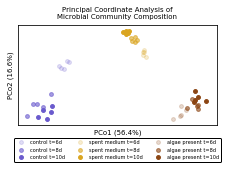

In [4]:
# PLOT PCOA FOR NO METABOLITE ADDED EXPERIMENT

# setup
plt.figure(figsize=(3.35,2.5))
labels = {'all':'all samples',
          'none':'control',
          'micro':'Microchloropsis',
          'phaeo':'algae present',
          'SM':'spent medium'}
algae = {'none':'none',
         'micro':'Microchloropsis',
         'phaeo':'Phaeodactylum',
         'SM':'Phaeodactylum spent medium'}
colors = {'all':'black',
          'none':'slateblue',
          'micro':'green',
          'phaeo':'saddlebrown',
          'SM':'goldenrod'}

# plot the points
plotdata = metadata.merge(PCoAdata_ctrl, left_index=True, right_index=True)
for a in ['none','SM', 'phaeo']:
    mydata = plotdata.loc[plotdata['algae']==algae[a]]
    plt.scatter(mydata.loc[mydata['time']==6]['Axis.1'],
                mydata.loc[mydata['time']==6]['Axis.2'], 
                color=colors[a], marker='o', alpha=0.2, s=15,label=labels[a] + ' t=6d')
    plt.scatter(mydata.loc[mydata['time']==8]['Axis.1'],
                mydata.loc[mydata['time']==8]['Axis.2'], 
                color=colors[a], marker='o', alpha=0.6, s=15, label=labels[a] + ' t=8d')
    plt.scatter(mydata.loc[mydata['time']==10]['Axis.1'],
                mydata.loc[mydata['time']==10]['Axis.2'], 
                color=colors[a], marker='o', alpha=1, s=15, label=labels[a] + ' t=10d')
    
# add the legend
plt.legend(bbox_to_anchor=[0.5,-0.1], loc='upper center', fontsize=5, ncol=3,framealpha=1, edgecolor='k')

# add labels and cleanup
plt.xticks([])
plt.yticks([])
# percentages of variance explained calculate in R script (phyloseq_analysis.R) and coppied over here
plt.xlabel('PCo1 (56.4%)', fontsize=7)
plt.ylabel('PCo2 (16.6%)', fontsize=7)
plt.title('Principal Coordinate Analysis of\nMicrobial Community Composition', fontsize=7)

plt.tight_layout()
plt.savefig('Figure1.png', dpi=300)
plt.show()

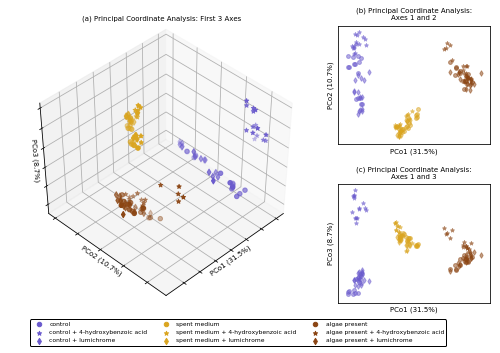

In [5]:
# PCOA FOR EXPERIMENT WITH METABOLITE ADDITIONS

# setup
fig = plt.figure(figsize=(6.88,5))
gs = GridSpec(2, 2, width_ratios=[2,1], height_ratios=[1,1])
ax3D = fig.add_subplot(gs[0:2,0], projection='3d')
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,1])

plotdata = metadata.merge(PCoAdata, left_index=True, right_index=True)

#  plot axis 2 vs axis 1
plt.sca(ax1)
for a in ['none', 'SM','phaeo']:
    mydata = plotdata.loc[plotdata['algae']==algae[a]]
    plt.scatter(mydata.loc[mydata['metabolite']=='none']['Axis.1'],
                mydata.loc[mydata['metabolite']=='none']['Axis.2'], 
                color=colors[a], marker='o', alpha=0.5, s=15, label=labels[a])
    plt.scatter(mydata.loc[mydata['metabolite']=='4hydroxybenzoic_acid']['Axis.1'],
                mydata.loc[mydata['metabolite']=='4hydroxybenzoic_acid']['Axis.2'], 
                color=colors[a], marker='*', alpha=0.5, s=15, label=labels[a]+' + 4-hydroxybenzoic acid')
    plt.scatter(mydata.loc[mydata['metabolite']=='lumichrome']['Axis.1'],
                mydata.loc[mydata['metabolite']=='lumichrome']['Axis.2'], 
                color=colors[a], marker='d', alpha=0.5, s=15, label=labels[a]+' + lumichrome')
plt.xticks([])
plt.yticks([])
# percentages of variance explained calculate in R script (phyloseq_analysis.R) and coppied over here
plt.xlabel('PCo1 (31.5%)', fontsize=7) 
plt.ylabel('PCo2 (10.7%)', fontsize=7)
plt.title('(b) Principal Coordinate Analysis:\nAxes 1 and 2', fontsize=7)

# plot axis 3 vs axis 1
plt.sca(ax2)
for a in ['none', 'SM','phaeo']:
    mydata = plotdata.loc[plotdata['algae']==algae[a]]
    plt.scatter(mydata.loc[mydata['metabolite']=='none']['Axis.1'],
                mydata.loc[mydata['metabolite']=='none']['Axis.3'], 
                color=colors[a], marker='o', alpha=0.5, s=15, label=labels[a])
    plt.scatter(mydata.loc[mydata['metabolite']=='4hydroxybenzoic_acid']['Axis.1'],
                mydata.loc[mydata['metabolite']=='4hydroxybenzoic_acid']['Axis.3'], 
                color=colors[a], marker='*', alpha=0.5, s=15,label=labels[a]+' + 4-hydroxybenzoic acid')
    plt.scatter(mydata.loc[mydata['metabolite']=='lumichrome']['Axis.1'],
                mydata.loc[mydata['metabolite']=='lumichrome']['Axis.3'], 
                color=colors[a], marker='d', alpha=0.5, s=15,label=labels[a]+' + lumichrome')
plt.xticks([])
plt.yticks([])
# percentages of variance explained calculate in R script (phyloseq_analysis.R) and coppied over here
plt.xlabel('PCo1 (31.5%)', fontsize=7)
plt.ylabel('PCo3 (8.7%)', fontsize=7)
plt.title('(c) Principal Coordinate Analysis:\nAxes 1 and 3', fontsize=7)

# plot axis 3 vs axis 2 vs axis 1 in 3D
plt.sca(ax3D)
for a in ['none', 'SM','phaeo']:
    mydata = plotdata.loc[plotdata['algae']==algae[a]]
    ax3D.scatter(mydata.loc[mydata['metabolite']=='none']['Axis.1'],
                mydata.loc[mydata['metabolite']=='none']['Axis.2'], 
                mydata.loc[mydata['metabolite']=='none']['Axis.3'],
                color=colors[a], marker='o', label=labels[a])
    ax3D.scatter(mydata.loc[mydata['metabolite']=='4hydroxybenzoic_acid']['Axis.1'],
                mydata.loc[mydata['metabolite']=='4hydroxybenzoic_acid']['Axis.2'], 
                mydata.loc[mydata['metabolite']=='4hydroxybenzoic_acid']['Axis.3'],
                color=colors[a], marker='*', label=labels[a]+' + 4-hydroxybenzoic acid')
    ax3D.scatter(mydata.loc[mydata['metabolite']=='lumichrome']['Axis.1'],
                mydata.loc[mydata['metabolite']=='lumichrome']['Axis.2'], 
                mydata.loc[mydata['metabolite']=='lumichrome']['Axis.3'],
                color=colors[a], marker='d', label=labels[a]+' + lumichrome')
ax3D.set_xticklabels('')
ax3D.set_yticklabels('')
ax3D.set_zticklabels('')
ax3D.tick_params(length=0)
plt.title('(a) Principal Coordinate Analysis: First 3 Axes\n\n\n', fontsize=7)
# percentages of variance explained calculate in R script (phyloseq_analysis.R) and coppied over here
ax3D.set_xlabel('PCo1 (31.5%)',labelpad=-15, fontsize=7)
ax3D.set_ylabel('PCo2 (10.7%)',labelpad=-15, fontsize=7)
ax3D.set_zlabel('PCo3 (8.7%)',labelpad=-15, fontsize=7)
ax3D.view_init(elev=45, azim=45)

# add a legend
plt.legend(bbox_to_anchor=[0.75,-0.05], loc='upper center', ncol=3, fontsize=6,framealpha=1, edgecolor='k')

plt.tight_layout()
plt.subplots_adjust(wspace=0.1, left=0)
plt.savefig('Figure5.png',transparent=True, dpi=300), 
plt.show()

In [6]:
# LOAD ALPHA (SHANNON) DIVERSITY DATA

# these are the Shannon diversity data from the phyloseq analysis

shannon = pd.read_csv('ProcessedSequencingData/ctrShannon_ABC.csv', index_col=0)
shannon = metadata.merge(shannon, left_index=True, right_index=True)
shannon.sort_values(['algae','time'], inplace=True)

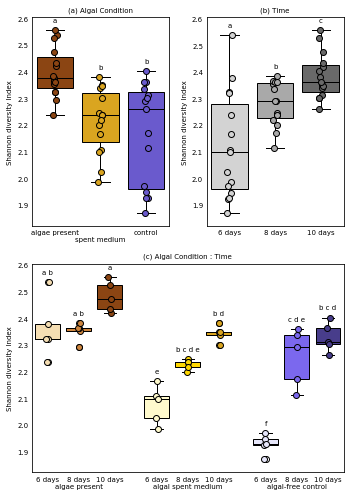

In [7]:
# PLOT ALPHA DIVERSITY DATA

# setup
fig = plt.figure(figsize=(5,7))
gs = GridSpec(2, 2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0:2])


# plot by algal condition
plt.sca(ax1)
# boxplots
bp1 = plt.boxplot([shannon.loc[shannon['algae']=='Phaeodactylum']['Shannon'], 
                   shannon.loc[shannon['algae']=='Phaeodactylum spent medium']['Shannon'], 
                   shannon.loc[shannon['algae']=='none']['Shannon']], 
                  positions=[0,1,2], widths=0.8,
                  medianprops={'color':'k'}, patch_artist=True, zorder=1)
bp1['boxes'][0].set_facecolor('saddlebrown')
bp1['boxes'][1].set_facecolor('goldenrod')
bp1['boxes'][2].set_facecolor('slateblue')
# scatter to show individual data points
plt.scatter(np.zeros(15)+0.1*(0.5-np.random.rand(15)),
            shannon.loc[shannon['algae']=='Phaeodactylum']['Shannon'],
            color = 'saddlebrown', edgecolor='k', zorder=10)
plt.scatter(np.ones(15)+0.1*(0.5-np.random.rand(15)),
            shannon.loc[shannon['algae']=='Phaeodactylum spent medium']['Shannon'],
            color = 'goldenrod', edgecolor='k', zorder=10)
plt.scatter(2*np.ones(15)+0.1*(0.5-np.random.rand(15)),
            shannon.loc[shannon['algae']=='none']['Shannon'],
            color = 'slateblue', edgecolor='k', zorder=10)
# letters to show statistical differences (from Tukeys test in R script - phyloseq_analysis.R)
plt.text(0,max(shannon.loc[(shannon['algae'] == 'Phaeodactylum')]['Shannon']),'a\n', 
         ha='center', va='bottom', fontsize=7)
plt.text(1,max(shannon.loc[(shannon['algae'] == 'Phaeodactylum spent medium')]['Shannon']),'b\n', 
         ha='center', va='bottom', fontsize=7)
plt.text(2,max(shannon.loc[(shannon['algae'] == 'none')]['Shannon']),'b\n', 
         ha='center', va='bottom', fontsize=7)
# cleanup
plt.xticks([0,1,2],['algae present','\nspent medium','control'], fontsize=7)
plt.ylabel('Shannon diversity Index', fontsize=7)
plt.yticks(fontsize=7)
plt.title('(a) Algal Condition', fontsize=7)
ax1.tick_params(length=0)


# plot by time
plt.sca(ax2)
# boxplots
bp2 = plt.boxplot([shannon.loc[shannon['time']==6]['Shannon'], 
                   shannon.loc[shannon['time']==8]['Shannon'], 
                   shannon.loc[shannon['time']==10]['Shannon']], 
                  positions=[0,1,2], widths=0.8, 
                  medianprops={'color':'k'}, patch_artist=True, zorder=1)
bp2['boxes'][0].set_facecolor('lightgrey')
bp2['boxes'][1].set_facecolor('darkgrey')
bp2['boxes'][2].set_facecolor('dimgrey')
# scatter to show individual data points
plt.scatter(np.zeros(15)+0.1*(0.5-np.random.rand(15)),
            shannon.loc[shannon['time']==6]['Shannon'],
            color = 'lightgrey', edgecolor='k', zorder=10)
plt.scatter(np.ones(15)+0.1*(0.5-np.random.rand(15)),
            shannon.loc[shannon['time']==8]['Shannon'],
            color = 'darkgrey', edgecolor='k', zorder=10)
plt.scatter(2*np.ones(15)+0.1*(0.5-np.random.rand(15)),
            shannon.loc[shannon['time']==10]['Shannon'],
            color = 'dimgrey', edgecolor='k', zorder=10)
# letters to show statistical differences (from Tukeys test in R script - phyloseq_analysis.R)
plt.text(0,max(shannon.loc[(shannon['time'] == 6)]['Shannon']),'a\n', 
         ha='center', va='bottom', fontsize=7)
plt.text(1,max(shannon.loc[(shannon['time'] == 8)]['Shannon']),'b\n', 
         ha='center', va='bottom', fontsize=7)
plt.text(2,max(shannon.loc[(shannon['time'] == 10)]['Shannon']),'c\n', 
         ha='center', va='bottom', fontsize=7)
# cleanup
plt.xticks([0,1,2],['6 days','8 days','10 days'], fontsize=7)
plt.ylabel('Shannon diversity Index', fontsize=7)
plt.yticks(fontsize=7)
plt.title('(b) Time', fontsize=7)
ax2.tick_params(length=0)


# plot by algal conditions x time
plt.sca(ax3)
# boxplots
bp3 = plt.boxplot([shannon.loc[(shannon['algae']=='Phaeodactylum') & (shannon['time'] == 6)]['Shannon'], 
                   shannon.loc[(shannon['algae']=='Phaeodactylum') & (shannon['time'] == 8)]['Shannon'], 
                   shannon.loc[(shannon['algae']=='Phaeodactylum') & (shannon['time'] == 10)]['Shannon'],
                   shannon.loc[(shannon['algae']=='Phaeodactylum spent medium') & (shannon['time'] == 6)]['Shannon'], 
                   shannon.loc[(shannon['algae']=='Phaeodactylum spent medium') & (shannon['time'] == 8)]['Shannon'], 
                   shannon.loc[(shannon['algae']=='Phaeodactylum spent medium') & (shannon['time'] == 10)]['Shannon'],
                   shannon.loc[(shannon['algae']=='none') & (shannon['time'] == 6)]['Shannon'], 
                   shannon.loc[(shannon['algae']=='none') & (shannon['time'] == 8)]['Shannon'], 
                   shannon.loc[(shannon['algae']=='none') & (shannon['time'] == 10)]['Shannon']], 
                  positions=[0,1,2,3.5,4.5,5.5,7,8,9], widths=0.8,
                  medianprops={'color':'k'}, patch_artist=True, zorder=1)
bp3['boxes'][0].set_facecolor('wheat')
bp3['boxes'][1].set_facecolor('peru')
bp3['boxes'][2].set_facecolor('saddlebrown')
bp3['boxes'][3].set_facecolor('lemonchiffon')
bp3['boxes'][4].set_facecolor('gold')
bp3['boxes'][5].set_facecolor('goldenrod')
bp3['boxes'][6].set_facecolor('lavender')
bp3['boxes'][7].set_facecolor('mediumslateblue')
bp3['boxes'][8].set_facecolor('darkslateblue')
# scatter to show individual data points
plt.scatter(np.zeros(5)+0.1*(0.5-np.random.rand(5)),
            shannon.loc[(shannon['algae']=='Phaeodactylum') & (shannon['time'] == 6)]['Shannon'],
            color = 'wheat', edgecolor='k', zorder=10)
plt.scatter(np.ones(5)+0.1*(0.5-np.random.rand(5)),
            shannon.loc[(shannon['algae']=='Phaeodactylum') & (shannon['time'] == 8)]['Shannon'],
            color = 'peru', edgecolor='k', zorder=10)
plt.scatter(2*np.ones(5)+0.1*(0.5-np.random.rand(5)),
            shannon.loc[(shannon['algae']=='Phaeodactylum') & (shannon['time'] == 10)]['Shannon'],
            color = 'saddlebrown', edgecolor='k', zorder=10)
plt.scatter(3.5*np.ones(5)+0.1*(0.5-np.random.rand(5)),
            shannon.loc[(shannon['algae']=='Phaeodactylum spent medium') & (shannon['time'] == 6)]['Shannon'],
            color = 'lemonchiffon', edgecolor='k', zorder=10)
plt.scatter(4.5*np.ones(5)+0.1*(0.5-np.random.rand(5)),
            shannon.loc[(shannon['algae']=='Phaeodactylum spent medium') & (shannon['time'] == 8)]['Shannon'],
            color = 'gold', edgecolor='k', zorder=10)
plt.scatter(5.5*np.ones(5)+0.1*(0.5-np.random.rand(5)),
            shannon.loc[(shannon['algae']=='Phaeodactylum spent medium') & (shannon['time'] == 10)]['Shannon'],
            color = 'goldenrod', edgecolor='k', zorder=10)
plt.scatter(7*np.ones(5)+0.1*(0.5-np.random.rand(5)),
            shannon.loc[(shannon['algae']=='none') & (shannon['time'] == 6)]['Shannon'],
            color = 'lavender', edgecolor='k', zorder=10)
plt.scatter(8*np.ones(5)+0.1*(0.5-np.random.rand(5)),
            shannon.loc[(shannon['algae']=='none') & (shannon['time'] == 8)]['Shannon'],
            color = 'mediumslateblue', edgecolor='k', zorder=10)
plt.scatter(9*np.ones(5)+0.1*(0.5-np.random.rand(5)),
            shannon.loc[(shannon['algae']=='none') & (shannon['time'] == 10)]['Shannon'],
            color = 'darkslateblue', edgecolor='k', zorder=10)
# letters to show statistical differences (from Tukeys test in R script - phyloseq_analysis.R)
plt.text(0,max(shannon.loc[(shannon['algae']=='Phaeodactylum') & (shannon['time'] == 6)]['Shannon']),'a b\n', 
         ha='center', va='bottom', fontsize=7)
plt.text(1,max(shannon.loc[(shannon['algae']=='Phaeodactylum') & (shannon['time'] == 8)]['Shannon']),'a b\n', 
         ha='center', va='bottom', fontsize=7)
plt.text(2,max(shannon.loc[(shannon['algae']=='Phaeodactylum') & (shannon['time'] == 10)]['Shannon']),'a\n', 
         ha='center', va='bottom', fontsize=7)
plt.text(3.5,max(shannon.loc[(shannon['algae']=='Phaeodactylum spent medium') & (shannon['time'] == 6)]['Shannon']),'e\n', 
         ha='center', va='bottom', fontsize=7)
plt.text(4.5,max(shannon.loc[(shannon['algae']=='Phaeodactylum spent medium') & (shannon['time'] == 8)]['Shannon']),'b c d e\n', 
         ha='center', va='bottom', fontsize=7)
plt.text(5.5,max(shannon.loc[(shannon['algae']=='Phaeodactylum spent medium') & (shannon['time'] == 10)]['Shannon']),'b d\n', 
         ha='center', va='bottom', fontsize=7)
plt.text(7,max(shannon.loc[(shannon['algae']=='none') & (shannon['time'] == 6)]['Shannon']),'f\n', 
         ha='center', va='bottom', fontsize=7)
plt.text(8,max(shannon.loc[(shannon['algae']=='none') & (shannon['time'] == 8)]['Shannon']),'c d e\n', 
         ha='center', va='bottom', fontsize=7)
plt.text(9,max(shannon.loc[(shannon['algae']=='none') & (shannon['time'] == 10)]['Shannon']),'b c d\n', 
         ha='center', va='bottom', fontsize=7)
# cleanup
plt.xticks([0,1,2,3.5,4.5,5.5,7,8,9],
           ['6 days','8 days\nalgae present','10 days', 
            '6 days','8 days\nalgal spent medium','10 days',
            '6 days','8 days\nalgal-free control','10 days'],
           fontsize=7)
plt.ylabel('Shannon diversity Index', fontsize=7)
plt.yticks(fontsize=7)
plt.title('(c) Algal Condition : Time', fontsize=7)
ax3.tick_params(length=0)

plt.tight_layout()
plt.savefig('FigureS8.png', dpi=300)
plt.show()
